In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K

#Clear TF memory
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
diabetes_df = pd.read_csv('pima-indians-diabetes.csv')
diabetes_df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [3]:
diabetes_df.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [4]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [5]:
#Apply the constraint to all the columns in cols_to_norm
diabetes_df[cols_to_norm] = diabetes_df[cols_to_norm].apply(lambda x: (x-x.min()) / (x.max()-x.min()))

In [8]:
diabetes_df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [9]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
gluc = tf.feature_column.numeric_column('Glucose_concentration')
blood_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [10]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', vocabulary_list=['A', 'B', 'C', 'D'])

In [11]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10) #10 is the number of groups you expect (but we only have 4)

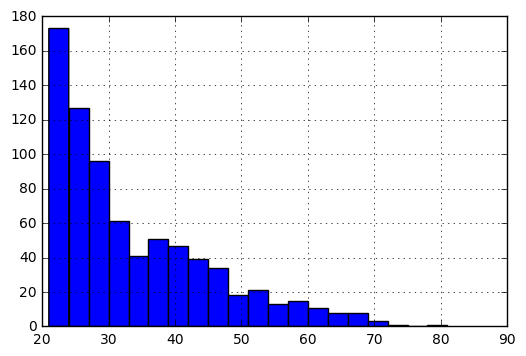

In [12]:
diabetes_df['Age'].hist(bins=20)

In [13]:
age_bucketized = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [17]:
feat_cols = [num_preg,gluc,blood_press,tricep,insulin,bmi,pedigree,assigned_group,age_bucketized]
feat_cols

[_NumericColumn(key='Number_pregnant', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Glucose_concentration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Blood_pressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Triceps', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Pedigree', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 _BucketizedColumn(source_column=_NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_

# Train test split

In [23]:
data = diabetes_df.drop('Class', axis=1) 

In [24]:
data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [26]:
labels = diabetes_df['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=101)

# Define input functions to train

In [35]:
input_function = tf.estimator.inputs.pandas_input_fn(x=x_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

# Define the model

In [33]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_ps_replicas': 0, '_master': '', '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_task_type': 'worker', '_task_id': 0, '_session_config': None, '_save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E56AC48208>, '_service': None, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_num_worker_replicas': 1, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmpget2rnm2'}


In [34]:
model.train(input_fn=input_function, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpget2rnm2\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.931472
INFO:tensorflow:global_step/sec: 112.144
INFO:tensorflow:step = 101, loss = 4.658455 (0.894 sec)
INFO:tensorflow:global_step/sec: 123.65
INFO:tensorflow:step = 201, loss = 6.2295475 (0.808 sec)
INFO:tensorflow:global_step/sec: 122.289
INFO:tensorflow:step = 301, loss = 7.7219386 (0.819 sec)
INFO:tensorflow:global_step/sec: 122.159
INFO:tensorflow:step = 401, loss = 6.4810977 (0.818 sec)
INFO:tensorflow:global_step/sec: 125.354
INFO:tensorflow:step = 501, loss = 4.6110034 (0.798 sec)
INFO:tensorflow:global_step/sec: 124.729
INFO:tensorflow:step = 601, loss = 6.451432 (0.802 sec)
INFO:tensorflow:global_step/sec: 125.985
INFO:tensorflow:step = 701, loss = 5.3084135 (0.794 sec)
INFO:tensorflow:global_step/sec: 129.074
INFO:tensorflow:step = 801, loss = 3.742208 (0.775 sec)
INFO:tensorflow:global_step

# Evaluate the model with test set

In [36]:
test_input_function = tf.estimator.inputs.pandas_input_fn(x=x_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)
results = model.evaluate(input_fn=test_input_function)

INFO:tensorflow:Starting evaluation at 2018-06-12-22:40:49
INFO:tensorflow:Restoring parameters from C:\Users\STRIKE~1\AppData\Local\Temp\tmpget2rnm2\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-06-12-22:40:50
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.80160487, auc_precision_recall = 0.6442563, average_loss = 0.5249508, global_step = 1000, label/mean = 0.35064936, loss = 5.052652, prediction/mean = 0.35856906


In [39]:
results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80160487,
 'auc_precision_recall': 0.6442563,
 'average_loss': 0.5249508,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.052652,
 'prediction/mean': 0.35856906}

# Prediction

In [40]:
pred_input_function =tf.estimator.inputs.pandas_input_fn(x=x_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)
predictions = model.predict(input_fn=pred_input_function)

In [41]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\STRIKE~1\AppData\Local\Temp\tmpget2rnm2\model.ckpt-1000


In [42]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.50328195], dtype=float32),
  'logits': array([0.01312804], dtype=float32),
  'probabilities': array([0.49671802, 0.50328195], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6171607], dtype=float32),
  'logits': array([0.4775138], dtype=float32),
  'probabilities': array([0.3828394, 0.6171607], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.35180983], dtype=float32),
  'logits': array([-0.6110933], dtype=float32),
  'probabilities': array([0.64819014, 0.35180983], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3213559], dtype=float32),
  'logits': array([-0.7475475], dtype=float32),
  'probabilities': array([0.67864406, 0.3213559 ], dtype=float32)},
 {'class_ids'

# DNN model

In [43]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_ps_replicas': 0, '_master': '', '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_task_type': 'worker', '_task_id': 0, '_session_config': None, '_save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E56D69E7F0>, '_service': None, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_num_worker_replicas': 1, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmp80pxi8ke'}


In [44]:
dnn_model.train(input_fn=input_function, steps=1000) # => Error because the categoricalcolumn created
#Should provide an embedding_column

ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [45]:
embedded_group_col = tf.feature_column.embedding_column(categorical_column=assigned_group, dimension=4)

In [47]:
feat_cols = [num_preg,gluc,blood_press,tricep,insulin,bmi,pedigree,embedded_group_col,age_bucketized]
feat_cols

[_NumericColumn(key='Number_pregnant', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Glucose_concentration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Blood_pressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Triceps', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Pedigree', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _EmbeddingColumn(categorical_column=_VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0), dimension=4, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedN

In [49]:
input_function = tf.estimator.inputs.pandas_input_fn(x_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)
dnn_model.train(input_fn=input_function, steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_ps_replicas': 0, '_master': '', '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_task_type': 'worker', '_task_id': 0, '_session_config': None, '_save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E56D398048>, '_service': None, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_num_worker_replicas': 1, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmplrivbm0u'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmplrivbm0u\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.284495
INFO:tensorflow:global_step/sec: 126.784
INFO:tensorflow:step = 101, loss = 6.982216 (0.790 sec)
INFO:tensorflow:global_step/sec: 131.104
INFO:tensorflow:step = 201, loss = 6.2753754 (0.

In [50]:
test_input_function = tf.estimator.inputs.pandas_input_fn(x_test, y_test, batch_size=10, num_epochs=1, shuffle=False)
dnn_model.evaluate(input_fn=test_input_function)

INFO:tensorflow:Starting evaluation at 2018-06-12-22:54:51
INFO:tensorflow:Restoring parameters from C:\Users\STRIKE~1\AppData\Local\Temp\tmplrivbm0u\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-06-12-22:54:53
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.77056277, accuracy_baseline = 0.64935064, auc = 0.8376954, auc_precision_recall = 0.7171824, average_loss = 0.47251475, global_step = 1000, label/mean = 0.35064936, loss = 4.5479546, prediction/mean = 0.3391458


{'accuracy': 0.77056277,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8376954,
 'auc_precision_recall': 0.7171824,
 'average_loss': 0.47251475,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.5479546,
 'prediction/mean': 0.3391458}